In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('Tut_4(assesssment)/Bike-Sharing-Dataset/day.csv')
df1 = pd.read_csv('Tut_4(assesssment)/Bike-Sharing-Dataset/hour.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### What is season in dataset

In [4]:
df[df['season']==4]['mnth'].unique()

array([ 9, 10, 11, 12])

In [5]:
df[df['season']==3]['mnth'].unique()

array([6, 7, 8, 9])

#### Make actural seasons column

In [36]:
def seasons(x):
    
    if x in [12,1,2]:
        return 'Winter'
    
    elif x in [3,4,5]:
        return 'Spring'
    
    elif x in [6,7,8]:
        return 'Summer'
    
    elif x in [9,10,11]:
        return 'Fall'
    
    else:
        return 'Missing data'

In [37]:
df['S'] = df['mnth'].apply(seasons)
df['S'].value_counts()

Spring    184
Summer    184
Fall      182
Winter    181
Name: S, dtype: int64

#### The use of service of casual and registered users by season

<Figure size 1500x1000 with 0 Axes>

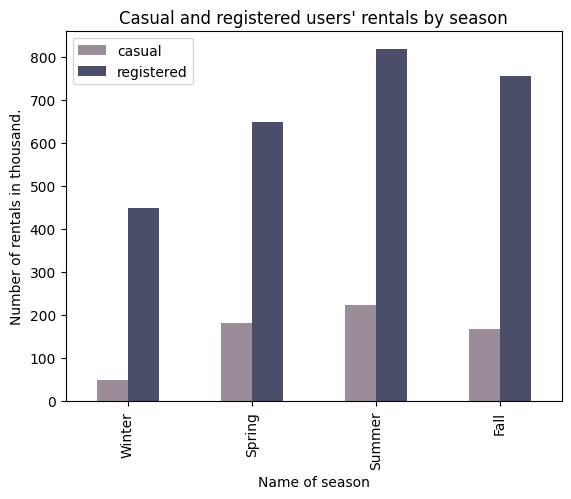

In [107]:
plt.figure(figsize=(15,10))
a = df.groupby('S', sort=False)[['casual','registered']].sum()/1000

a.plot(kind='bar',color=['#9a8c98','#4a4e69'])
plt.xlabel('Name of season')
plt.ylabel('Number of rentals in thousand.')
plt.title('Casual and registered users\' rentals by season')

plt.savefig('Cas_rent_by_season.png',bbox_inches='tight')

plt.show()



In [117]:
df1.groupby('hr')[['casual','registered']].sum()/1000

,casual,registered
hr,,
0,7.375,31.755
1,4.709,19.455
2,3.412,12.940
3,1.893,6.281
4,0.874,3.554
5,1.012,13.249
6,3.017,52.115
7,8.037,146.134
8,15.761,245.240


#### The use of service of casual and registered users by month

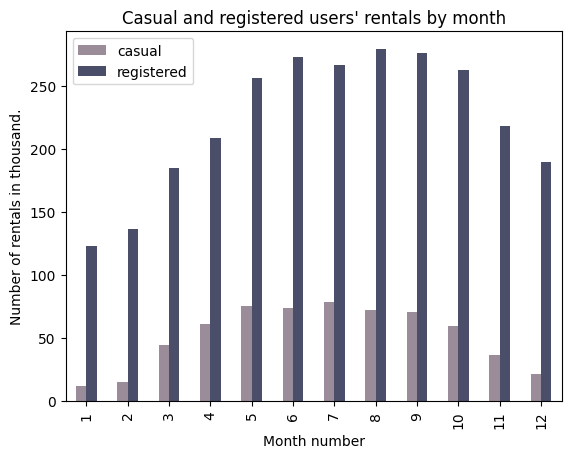

In [114]:
b= df.groupby('mnth')[['casual','registered']].sum()/1000
b.plot(kind='bar',color=['#9a8c98','#4a4e69'])

plt.xlabel('Month number')
plt.ylabel('Number of rentals in thousand.')
plt.title('Casual and registered users\' rentals by month')

plt.savefig('Cas_rent_by_month.png',bbox_inches='tight')


plt.show()

#### The use of service of casual and registered users by week

In [13]:
c = df.groupby('weekday')[['casual','registered']].sum()/1000
c.index=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

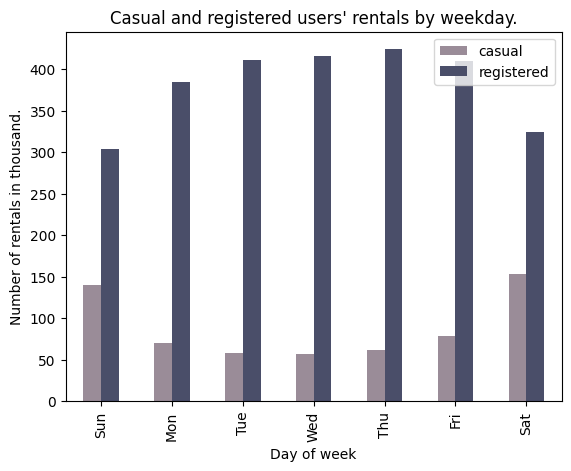

In [111]:
c.plot(kind='bar',color=['#9a8c98','#4a4e69'])
plt.xlabel('Day of week')
plt.ylabel('Number of rentals in thousand.')
plt.title('Casual and registered users\' rentals by weekday.')

plt.savefig('Cas_rent_by_weekday.png',bbox_inches='tight')

plt.show()

#### The use of service of casual and registered users by hour

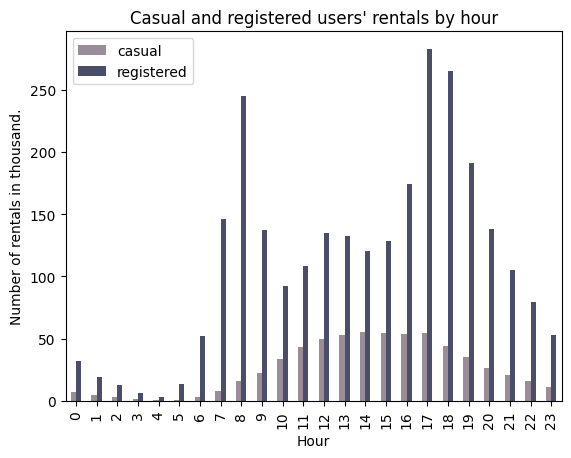

In [113]:


d = df1.groupby('hr')[['casual','registered']].sum()/1000

d.plot(kind='bar', color=['#9a8c98','#4a4e69'])
plt.xlabel('Hour')
plt.ylabel('Number of rentals in thousand.')
plt.title('Casual and registered users\' rentals by hour')

plt.savefig('Cas_rent_by_hour.png',bbox_inches='tight')
plt.show()

/var/folders/3x/hlj9s6ds18qgwdwbkz8jl4880000gn/T/ipykernel_87700/1596705480.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


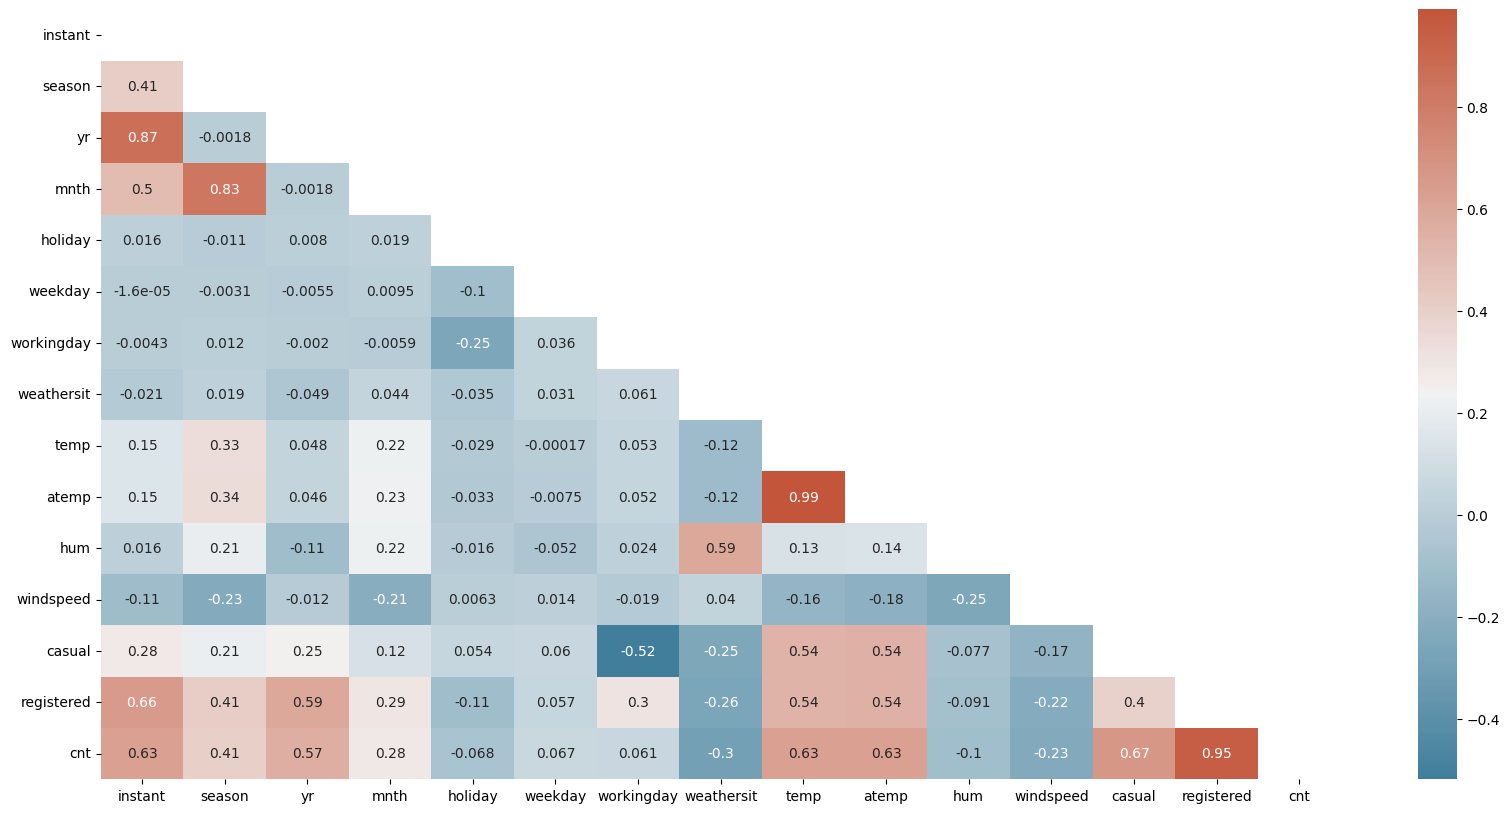

In [16]:
import seaborn as sns

#
# Correlation between different variables
#
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(20, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

plt.show()

### Create a column with actual temperature

In [17]:
df['t']= df['temp']*41

#### Distiribustions of temperature

Distribution properties are a set of characteristics that describe the behavior and pattern of a data set. These properties include:

**Shape**: The distribution's shape describes the overall pattern of the data, including its symmetry, skewness, and kurtosis.


**Central Tendency**: The central tendency describes the center of the data, such as mean, median, and mode.


**Spread**: The spread describes the range and dispersion of the data, such as variance and standard deviation.


**Outliers**: Outliers are values in the data set that are significantly higher or lower than the rest of the data.



**Normality**: Normality refers to the degree to which the data follows a normal or Gaussian distribution.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


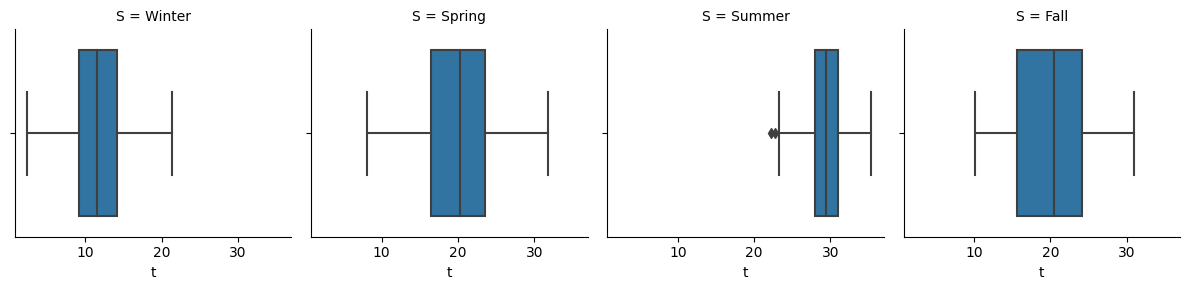

In [42]:
sns.FacetGrid(df, col= 'S').map(sns.boxplot,'t')
plt.show()

### Season average temperature

In [90]:
mean_temps = df.groupby('S',sort=False)['t'].mean()
mean_temps

S
Winter    11.734914
Spring    19.896327
Summer    29.372279
Fall      20.097443
Name: t, dtype: float64

In [88]:
mean_temps.iloc[1]

19.896327364130435

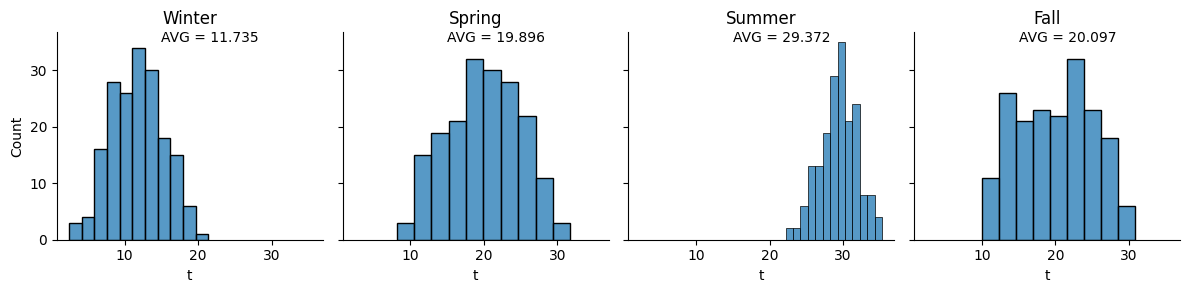

In [93]:
g = sns.FacetGrid(df, col= 'S').map(sns.histplot,'t')
t = ['Winter','Spring','Summer','Fall']

for i, ax in enumerate(g.axes.flat):
    ax.text( 15, 35,f"AVG = {round(mean_temps.iloc[i],3)}",fontsize=10)
    ax.set_title(t[i])


plt.show()

In [94]:
df.shape

(731, 18)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
 16  S           731 non-null    object 
 17  t           731 non-null    float64
dtypes: float64(5), int64(11), object(2)
memory usage: 102.9+ KB


<AxesSubplot: xlabel='t', ylabel='registered'>

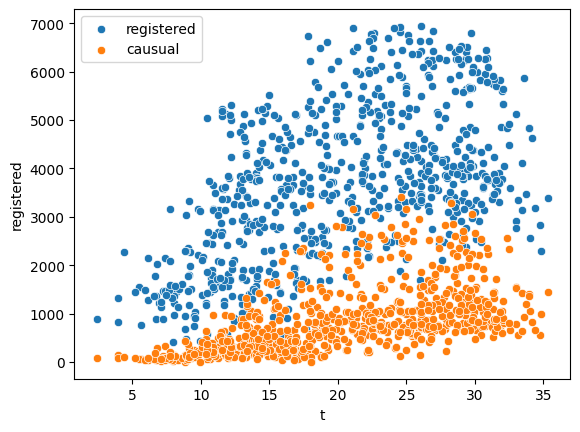

In [19]:
sns.scatterplot(x=df['t'],y=df['registered'],label='registered')
sns.scatterplot(x=df['t'],y=df['casual'],label='causual')

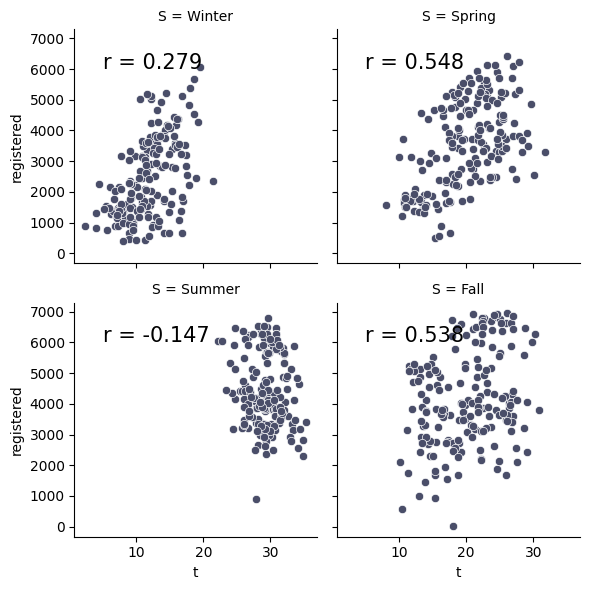

In [124]:
b = sns.FacetGrid(df, col='S', col_wrap=2).map(sns.scatterplot, 't','registered',color='#4a4e69')
cb = df.groupby('S')['registered'].corr(df['t'])

for i, ax in enumerate(b.axes.flat):
    ax.text( 5, 6000,f"r = {round(cb.iloc[i],3)}",fontsize=15)

    
plt.savefig('reg_cor.png',bbox_inches='tight')
plt.show()


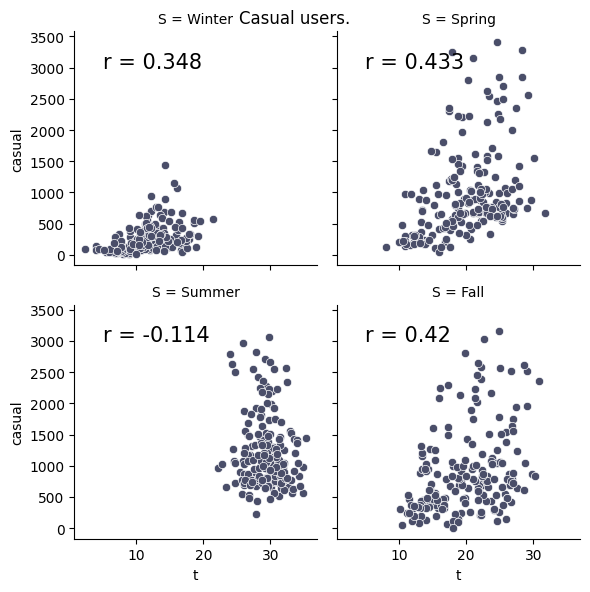

In [126]:
a = sns.FacetGrid(df, col='S',col_wrap=2).map(sns.scatterplot, 't','casual', color='#4a4e69')
ca = df.groupby('S')['casual'].corr(df['t'])
a.fig.suptitle('Casual users.')


for i, ax in enumerate(a.axes.flat):
    ax.text( 5, 3000,f"r = {round(ca.iloc[i],3)}",fontsize=15)
    
    
plt.savefig('cas_cor.png',bbox_inches='tight')
plt.show()

In [33]:
df.groupby('S')['registered'].corr(df['t'])

S
Fall      0.278719
Spring    0.547642
Summer   -0.147145
Winter    0.538456
Name: registered, dtype: float64

In [118]:
df.groupby('S')['registered'].corr(df['t'])

S
Fall      0.278719
Spring    0.547642
Summer   -0.147145
Winter    0.538456
Name: registered, dtype: float64

In [119]:
df.groupby('S')['casual'].corr(df['t'])

S
Fall      0.347979
Spring    0.433174
Summer   -0.113770
Winter    0.420451
Name: casual, dtype: float64